<a id="TOP"> </a>
<div class="alert alert-box alert-info">
</div>

***

# FINAL REPORT

## by David Howell 

# District Attorney Actions Based on Arrests - Project Summary

## Project Goals

> - Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways.
> - Create modules that make the process repeateable and the report (notebook) easier to read and follow.
> - Ask exploratory questions of the data that will help to understand more about the attributes and drivers of DA Actions. 
> - Refine the work into a report, in the form of a jupyter notebook, that I will walk through in a 5 minute presentation to our data science team about our goals, the work done, findings, methodologies, and conclusions.
> - Be prepared to answer panel questions about my code, process, findings and key takeaways, and model.

## Project Description

### Business Goals

> - Utilize a random forest for exploration and model prediction
> - Find the key drivers DA Actions in the San Fransico Courts.
> - Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.
> - Make recommendations on what works or doesn't work in predicting future DA Actions.

### Deliverables

> - **Readme (.md)**
> - **A Python Module or Modules that automate the data acquisition and preparation process**
> - **Final Report (.ipynb)**
> - 5 min Recorded Presentation

## Data Dictionary

|**Target**|**Definition**
|:-------|:----------|
|**DA Action**|**Limited to Charges Filed or Discharged**|

|**Feature**|**Definition**|
|:-------|:----------|
|**arresting agency**                 |**SF Police, Sheriff, Highway Patrol, or Bay Area Rapid Transit**|
|**crime type**              |**Examined the top 7 crimes by occurence**|
|**booked case type**                     |**Felony or Misdemeanor**|
|**domestic violence case?**   |**was it a domestic violence case**|
|**arrest date**                |**What was the Date of arrest**| 
|**year**                  |**What Year was that in**|


## Initial Hypotheses
> We believe that by using these predictors we can create a model that will beat basline predictions. 

## Executive Summary - Key Findings and Recommendations
> 1. Utilizing three different random forest models we were able to increase the accuracy of our predicitons in a meaningful way (60% up to nearly 80%).

> 2. The newly created features via feature engineering did something to add value to the DA Actions Taken dataset in terms of model creation.

> 3. Our recommendations are that we maybe delve deeper into clustering techniques if given more time possibly brining in other features such as  and maybe looking into more time sensitive data such as arrest dates, etc.

[_Acquire_](#acquire)

<a id="acquire"> </a>
<div class="alert alert-box alert-info">
</div>

***
### Acquire Phase

> - Utilized wrangle.py to pull zillow data from a Codeup database.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wrangle import wrangle_da, summarize

import scipy.stats as stats

from scipy.stats import pearsonr, spearmanr
from formating import percent, Percent, bold, col_cap, strike, underline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_da()

<a id="prepare"> </a>
<div class="alert alert-box alert-info">
</div>

***
### Prepare Phase

> - Utilized wranlge.py to clean up da actions dataset.
> - Split the overall dataset into my train, validate, and test datasets to be used later.
> - Utilized modeling.py to get dummies from the datasets in order to properly model the dataset.

<a id="explore"> </a>
<div class="alert alert-box alert-info">
</div>

***
### Explore Phase

> - Asked questions of the data and utilized visualizations and hypothesis testing to answer said questions.
> - Used clustering to further our exploration and created visualizations that enabled us to see the data in a new perspective.

# Is there a relationship between arresting agency and case type...?

In [4]:
for i in df.arresting_agency.unique():
    case_type_counts = df.booked_case_type[df.arresting_agency == i].value_counts(sort=False)
    tot_case = case_type_counts[0] + case_type_counts[1]
    fel_per = case_type_counts[0] / tot_case
    misd_per = case_type_counts[1] / tot_case
    print(f"{i}:\n\n {case_type_counts}\n\nFelony Percentage: {percent(fel_per)}\
\nMisdemeanor Percenrage: {percent(misd_per)}\n\n\n")


SFPD:

 Felony         81721
Misd Arrest    27544
Name: booked_case_type, dtype: int64

Felony Percentage: 74.79%
Misdemeanor Percenrage: 25.21%



SFSD:

 Felony         10897
Misd Arrest     4614
Name: booked_case_type, dtype: int64

Felony Percentage: 70.25%
Misdemeanor Percenrage: 29.75%



CHP:

 Felony         1646
Misd Arrest    7672
Name: booked_case_type, dtype: int64

Felony Percentage: 17.66%
Misdemeanor Percenrage: 82.34%



BART:

 Felony         517
Misd Arrest    842
Name: booked_case_type, dtype: int64

Felony Percentage: 38.04%
Misdemeanor Percenrage: 61.96%





## Felony/Misdemeanor Arrest Rates by Agency

|Agency|Total Arrests|Felony | Misdemeanor |
|---|---|---|---|
|SF Police D.| 109k| 75%| 25%|
|SF Sherrif Dept| 15.5k|70%| 30%|
|Cali. Highway Patrol| 9k |18% | 82%|
|Bay Area Rapid Trainsit| 1k | 38%| 62%|
<br><br>
- **It looks like the reported data shows The Police and Sherriff's Departments mostly deal with Felony Arrests**
- **While the Highway Patrol is almost entirely Misdemeanors**
- **And the Bay Area Rapid Transit has the closest to even percentages of Felony and Misdemeanor**
  - **With the exception that they only have 1359 total arrests in over 10 years**

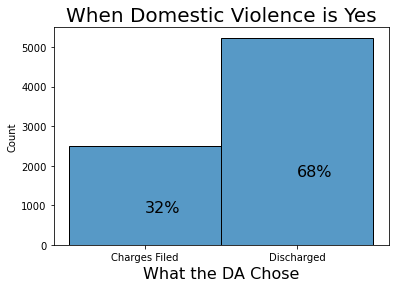

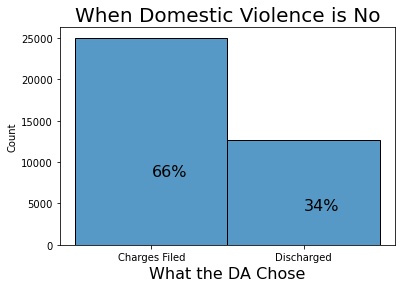

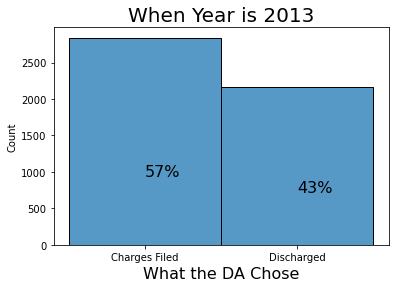

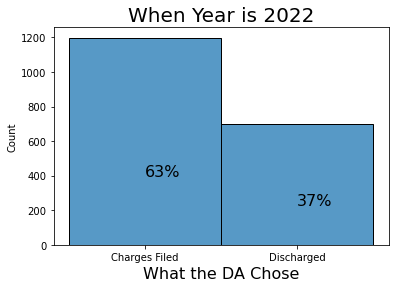

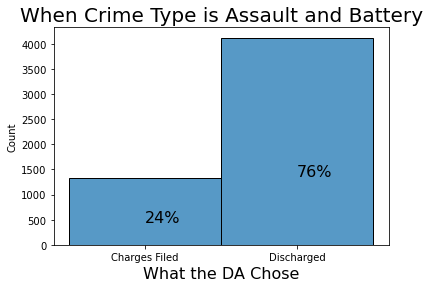

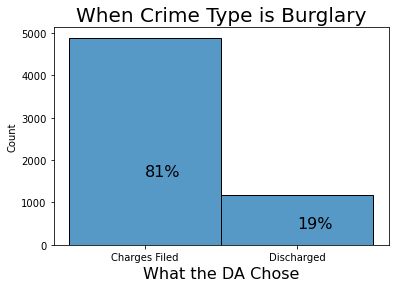

<a id="model"> </a>
<div class="alert alert-box alert-info">
</div>

***
### Model Phase

> - Set up the baseline prediction for future models to base their success on.
> - Trained multiple models for each type of Regression technique (Ordinary Least Squares, LASSO + LARS, and Polynomial Regression Model)
> - Validated all models to narrow down my selection to the best performing model.
> - Chose the MVP of all created models and used the test data set to ensure the best model worke entirely to expectations.

In [5]:
from exploration import explore_df, split_data
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


ImportError: cannot import name 'confusion' from partially initialized module 'modeling' (most likely due to a circular import) (/Users/davidhowell/codeup-data-scinence/da-actions-taken-on-arrests/modeling.py)

In [6]:
df = explore_df()

In [7]:
df

,court_number,arrest_date,arresting_agency,crime_type,booked_case_type,dv_case,da_action_taken,year,month,weekend,low_high_court_num
0,11000113,2011-01-01,SFPD,Robbery,Felony,No,Discharged,2011,1,1,high
1,11000406,2011-01-04,SFPD,Robbery,Felony,No,Discharged,2011,1,0,high
2,11000242,2011-01-03,SFPD,Robbery,Felony,No,Discharged,2011,1,0,high
3,11001323,2011-01-13,SFPD,Robbery,Felony,No,Discharged,2011,1,0,high
4,11001786,2011-01-17,SFPD,Robbery,Felony,No,Discharged,2011,1,0,high
...,...,...,...,...,...,...,...,...,...,...,...
75807,22000478,2022-01-14,SFPD,Burglary,Misd Arrest,No,Charges Filed,2022,1,0,high
75808,22001333,2022-02-07,SFSD,Burglary,Misd Arrest,No,Charges Filed,2022,2,0,high
75809,22005865,2022-06-17,SFPD,Burglary,Misd Arrest,No,Charges Filed,2022,6,0,high
75810,16000640,2016-01-10,SFPD,Burglary,Misd Arrest,No,Charges Filed,2016,1,1,high


In [8]:
df.drop(columns=['low_high_court_num', 'court_number', 'arrest_date', 'weekend'])

,arresting_agency,crime_type,booked_case_type,dv_case,da_action_taken,year,month
0,SFPD,Robbery,Felony,No,Discharged,2011,1
1,SFPD,Robbery,Felony,No,Discharged,2011,1
2,SFPD,Robbery,Felony,No,Discharged,2011,1
3,SFPD,Robbery,Felony,No,Discharged,2011,1
4,SFPD,Robbery,Felony,No,Discharged,2011,1
...,...,...,...,...,...,...,...
75807,SFPD,Burglary,Misd Arrest,No,Charges Filed,2022,1
75808,SFSD,Burglary,Misd Arrest,No,Charges Filed,2022,2
75809,SFPD,Burglary,Misd Arrest,No,Charges Filed,2022,6
75810,SFPD,Burglary,Misd Arrest,No,Charges Filed,2016,1


In [9]:
df = df.drop(columns=['low_high_court_num', 'court_number', 'arrest_date', 'weekend'])

In [10]:
df.da_action_taken.map({'Discharged': 0, 'Charges Filed': 1})

0        0
1        0
2        0
3        0
4        0
        ..
75807    1
75808    1
75809    1
75810    1
75811    1
Name: da_action_taken, Length: 75812, dtype: category
Categories (2, int64): [1 < 0]

In [11]:
df.da_action_taken = df.da_action_taken.map({'Discharged': 0, 'Charges Filed': 1})

In [12]:
df.columns.to_list()

['arresting_agency',
 'crime_type',
 'booked_case_type',
 'dv_case',
 'da_action_taken',
 'year',
 'month']

In [13]:
X_cols = ['arresting_agency',
 'crime_type',
 'booked_case_type',
 'dv_case',
 'year',
 'month']

In [14]:
y_col = df['da_action_taken']

In [15]:
df

,arresting_agency,crime_type,booked_case_type,dv_case,da_action_taken,year,month
0,SFPD,Robbery,Felony,No,0,2011,1
1,SFPD,Robbery,Felony,No,0,2011,1
2,SFPD,Robbery,Felony,No,0,2011,1
3,SFPD,Robbery,Felony,No,0,2011,1
4,SFPD,Robbery,Felony,No,0,2011,1
...,...,...,...,...,...,...,...
75807,SFPD,Burglary,Misd Arrest,No,1,2022,1
75808,SFSD,Burglary,Misd Arrest,No,1,2022,2
75809,SFPD,Burglary,Misd Arrest,No,1,2022,6
75810,SFPD,Burglary,Misd Arrest,No,1,2016,1


In [16]:
pd.get_dummies(df, columns=['arresting_agency', 'crime_type', 'booked_case_type', 'dv_case', 'year', 'month'], drop_first=True)

,da_action_taken,arresting_agency_CHP,arresting_agency_SFPD,arresting_agency_SFSD,crime_type_Assault and Battery,crime_type_Burglary,crime_type_DUI,crime_type_Narcotics,crime_type_Robbery,crime_type_Theft,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75807,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75808,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
75810,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df= pd.get_dummies(df, columns=['arresting_agency', 'crime_type', 'booked_case_type', 'dv_case', 'year', 'month'], drop_first=True)

In [18]:
train, validate, test = split_data(df,strat_by='da_action_taken')

Prepared df: (75812, 34)

Train: (45486, 34)
Validate: (15163, 34)
Test: (15163, 34)


In [19]:
df.columns.to_list()

['da_action_taken',
 'arresting_agency_CHP',
 'arresting_agency_SFPD',
 'arresting_agency_SFSD',
 'crime_type_Assault and Battery',
 'crime_type_Burglary',
 'crime_type_DUI',
 'crime_type_Narcotics',
 'crime_type_Robbery',
 'crime_type_Theft',
 'booked_case_type_Misd Arrest',
 'dv_case_Yes',
 'year_2012',
 'year_2013',
 'year_2014',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [20]:
X_cols = ['arresting_agency_CHP',
 'arresting_agency_SFPD',
 'arresting_agency_SFSD',
 'crime_type_Assault and Battery',
 'crime_type_Burglary',
 'crime_type_DUI',
 'crime_type_Narcotics',
 'crime_type_Robbery',
 'crime_type_Theft',
 'booked_case_type_Misd Arrest',
 'dv_case_Yes',
 'year_2012',
 'year_2013',
 'year_2014',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [21]:
y_col = ['da_action_taken']

In [22]:
X_train, y_train = train[X_cols], train[y_col]

X_validate, y_validate = validate[X_cols], validate[y_col]

X_test, y_test = test[X_cols], test[y_col]

In [23]:
X_train

,arresting_agency_CHP,arresting_agency_SFPD,arresting_agency_SFSD,crime_type_Assault and Battery,crime_type_Burglary,crime_type_DUI,crime_type_Narcotics,crime_type_Robbery,crime_type_Theft,booked_case_type_Misd Arrest,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
40829,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
68895,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
41045,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
56700,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2297,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42092,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
28276,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22800,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10457,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
y_train

,da_action_taken
40829,1
68895,1
41045,1
56700,0
2297,1
...,...
42092,1
28276,1
22800,1
10457,0


In [25]:
y_train.mode().values[0][0]

1

In [26]:
rfc = RandomForestClassifier(random_state=123)

NameError: name 'RandomForestClassifier' is not defined

In [27]:
rfc.fit(X_train, y_train.da_action_taken)

NameError: name 'rfc' is not defined

In [28]:
preds1 = rfc.predict(X_train)

NameError: name 'rfc' is not defined

In [29]:
y_train['pred_rfc1'] = preds1

NameError: name 'preds1' is not defined

In [30]:
y_train

,da_action_taken
40829,1
68895,1
41045,1
56700,0
2297,1
...,...
42092,1
28276,1
22800,1
10457,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true= y_train.da_action_taken, y_pred= y_train.pred_rfc1)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_train.da_action_taken, y_pred= y_train.pred_rfc1).ravel()

In [ ]:
confusion(TN, TP, FN, FP)

In [ ]:
y_train['baseline'] = 1

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_train.da_action_taken, y_pred= y_train.baseline).ravel()

confusion(TN, TP, FN, FP)

In [ ]:
rfc.predict(X_validate)

In [ ]:
y_validate['pred_rfc1']= rfc.predict(X_validate)

In [ ]:
y_validate['baseline'] = 1

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_validate.da_action_taken, y_pred= y_validate.baseline).ravel()

confusion(TN, TP, FN, FP)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_validate.da_action_taken, y_pred= y_validate.pred_rfc1).ravel()

confusion(TN, TP, FN, FP)

In [ ]:
rfc2 = RandomForestClassifier(random_state=123, min_samples_leaf=5, min_samples_split=5)

In [ ]:
rfc2.fit(X_train, y_train.da_action_taken)

In [ ]:
preds2 = rfc2.predict(X_train)

In [ ]:
y_train['pred_rfc2'] = preds2

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_train.da_action_taken, y_pred= y_train.pred_rfc2).ravel()

confusion(TN, TP, FN, FP)

In [ ]:
y_validate['pred_rfc2']= rfc2.predict(X_validate)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_true= y_validate.da_action_taken, y_pred= y_validate.pred_rfc2).ravel()

confusion(TN, TP, FN, FP)

In [ ]:
y_test['pred_rfc2']= rfc2.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_true= y_test.da_action_taken, y_pred= y_test.pred_rfc2).ravel()

confusion(TN, TP, FN, FP)

# Conclusions and Recommendations

> - We discovered that we could increase our accuracy over basline



<a id="conclusion"> </a>
<div class="alert alert-box alert-info">
</div>

***

<div class="alert alert-box alert-info">
</div>

***

## How To Reproduce Our Project

> 1. Read our README.md.
> 2. Download the wrangle.py, formating.py, evaluate.py, modeling.py, and final_report.ipynb files into your directory along with your own env file that contains your user, password, and host variables,
> 3. Run our final_report.ipynb notebook